# Funções para geração de resultados para algoritmo exaustivo

In [18]:
varia_filmes = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
varia_categorias = [2, 4, 8]

!g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random geradorInputs.cpp -o geradorInputs

for i in varia_filmes:
    for j in varia_categorias:
        !./geradorInputs {i} {j}
        !mv input.txt inputs_exaustiva/in-{i}-{j}.txt

In [19]:
# Gera outputs e mede tempo de execução
import time
import os

def get_files_in_directory(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_list.append(file)
    return file_list

# Specify the directory path
directory_path = 'inputs_exaustiva'

# Call the function to get the list of files
files = get_files_in_directory(directory_path)


runtime_gpu = {}
runtime_openMP = {}
runtime_exhaustive = {}

amount_of_films_gpu = {}
amount_of_films_openMP = {}
amount_of_films_exhaustive = {}

In [ ]:
for file in files:
    start_time = time.time()
    !./exaustiva_OpenMP inputs_exaustiva/{file} > outputs_exaustiva/out-openMP-{file}
    runtime_openMP[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-openMP-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_openMP[file] = int(first_line.split(' ')[0])

In [ ]:
for file in files:
    start_time = time.time()
    !./exaustiva inputs_exaustiva/{file} > outputs_exaustiva/out-exhaustive-{file}
    runtime_exhaustive[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-exhaustive-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_exhaustive[file] = int(first_line.split(' ')[0])

In [ ]:
for file in files:
    start_time = time.time()
    print
    !./exaustiva_gpu inputs_exaustiva/{file} > outputs_exaustiva/out-gpu-{file}
    runtime_gpu[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-gpu-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_gpu[file] = int(first_line.split(' ')[0])

In [20]:
# Gera arquivo csv com tempos de execução
import csv

with open('outputs_exaustiva/data_exaustiva.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['num_filmes','num_categorias', 'runtime_openMP', 'runtime_exhaustive', 'runtime_gpu', 'amount_of_films_openMP', 'amount_of_films_exhaustive', 'amount_of_films_gpu'])
    for input_value in runtime_openMP.keys():
        num_filmes = input_value.split('-')[1]
        num_categorias = input_value.split('-')[2].split('.')[0]
        writer.writerow([num_filmes, num_categorias, runtime_openMP[input_value], runtime_exhaustive[input_value], runtime_gpu[input_value], amount_of_films_openMP[input_value], amount_of_films_exhaustive[input_value], amount_of_films_gpu[input_value]])


In [31]:
import pandas as pd

output_files = get_files_in_directory('outputs_exaustiva')
output_files = output_files[1:]
df = pd.read_csv("outputs_exaustiva/data_exaustiva.csv")


# Gráficos e Tabelas

In [32]:
# Tabela de tempo de execução
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('outputs_exaustiva/data_exaustiva.csv')

df = df.set_index(['num_filmes', 'num_categorias'])

df = df.sort_values(['num_filmes', 'num_categorias'], ascending = [True, True])

df_runtime = df[['runtime_openMP', 'runtime_exhaustive', 'runtime_gpu']]

df_runtime

runtime_openMP  runtime_exhaustive  runtime_gpu
num_filmes num_categorias                                                 
10         2                     0.104432            0.104056     0.304227
           4                     0.104231            0.102728     0.305477
           8                     0.103997            0.102480     0.303863
12         2                     0.105148            0.103248     0.304481
           4                     0.102890            0.102557     0.305086
           8                     0.102931            0.103942     0.344501
14         2                     0.103168            0.104327     0.305151
           4                     0.102876            0.102822     0.303882
           8                     0.102664            0.103849     0.303825
16         2                     0.103186            0.103350     0.303945
           4                     0.103731            0.103233     0.307360
           8                     0.102644            0.102665     0.304940
18         2                     0.102416            0.104976     0.310871
           4                     0.104584            0.204119     0.331205
           8                     0.203097            0.203170     0.303971
20         2                     0.303401            0.303445     0.328778
           4                     0.106926            0.102803     0.310786
           8                     0.303628            0.403497     0.304079
22         2                     0.804692            1.609032     0.311101
           4                     0.104909            0.103073     0.304394
           8                     0.704410            0.906145     0.509309
24         2                     0.604073            0.704200     0.303880
           4                     4.316024            6.318916     0.304093
           8                     1.907409            3.110746     0.321051
26         2                     5.742097            4.615978     0.304747
           4                     0.506870            0.906530     0.304306
           8                     0.906555            1.205579     0.303976
28         2                    14.263436           17.250006     0.303670
           4                     1.105053            1.706835     0.403889
           8                     9.852870           10.230665     0.404117
30         2                    32.652962           39.909161     0.304207
           4                    37.713203           43.527416     0.505190
           8                    72.886886           86.638348     0.704984

In [33]:
# Tabela de quantidade de filmes
df_filmes = df[['amount_of_films_openMP', 'amount_of_films_exhaustive', 'amount_of_films_gpu']]
df_filmes

amount_of_films_openMP  amount_of_films_exhaustive  \
num_filmes num_categorias                                                       
10         2                                    4                           4   
           4                                    5                           5   
           8                                    3                           3   
12         2                                    3                           3   
           4                                    5                           5   
           8                                    6                           6   
14         2                                    2                           2   
           4                                    5                           5   
           8                                    5                           5   
16         2                                    3                           3   
           4                                    5                           5   
           8                                    7                           7   
18         2                                    2                           2   
           4                                    7                           7   
           8                                    7                           7   
20         2                                    2                           2   
           4                                    4                           4   
           8                                    5                           5   
22         2                                    2                           2   
           4                                    6                           6   
           8                                    8                           8   
24         2                                    4                           4   
           4                                    6                           6   
           8                                    6                           6   
26         2                                    2                           2   
           4                                    5                           5   
           8                                    5                           5   
28         2                                    3                           3   
           4                                    6                           6   
           8                                    6                           6   
30         2                                    2                           2   
           4                                    7                           7   
           8                                    8                           8   

                           amount_of_films_gpu  
num_filmes num_categorias                       
10         2                                 4  
           4                                 5  
           8                                 3  
12         2                                 3  
           4                                 5  
           8                                 6  
14         2                                 2  
           4                                 5  
           8                                 5  
16         2                                 3  
           4                                 5  
           8                                 7  
18         2                                 2  
           4                                 7  
           8                                 7  
20         2                                 2  
           4                                 4  
           8                                 5  
22         2                                 2  
           4                                 6  
           8                                 8  
24         2                                 4  
           4   

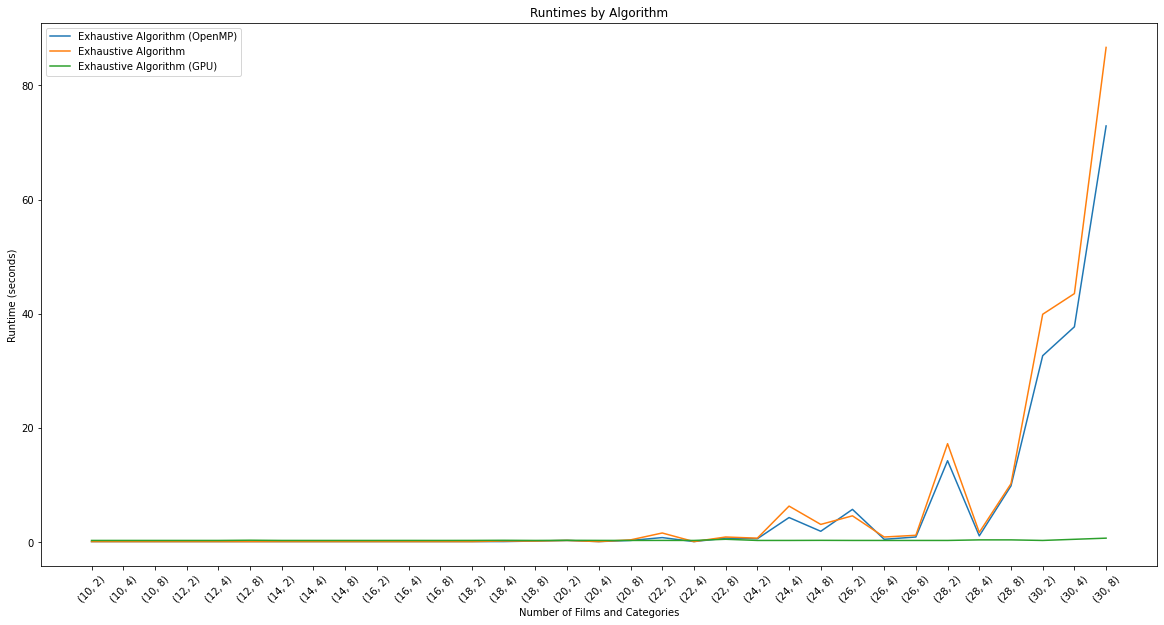

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
df_runtime['runtime_openMP'].plot(ax=ax, label='Exhaustive Algorithm (OpenMP)')
df_runtime['runtime_exhaustive'].plot(ax=ax, label='Exhaustive Algorithm')
df_runtime['runtime_gpu'].plot(ax=ax, label='Exhaustive Algorithm (GPU)')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
ax.set_xticks(range(len(df_runtime.index)))
ax.set_xticklabels(df_runtime.index, rotation=45)
plt.show()

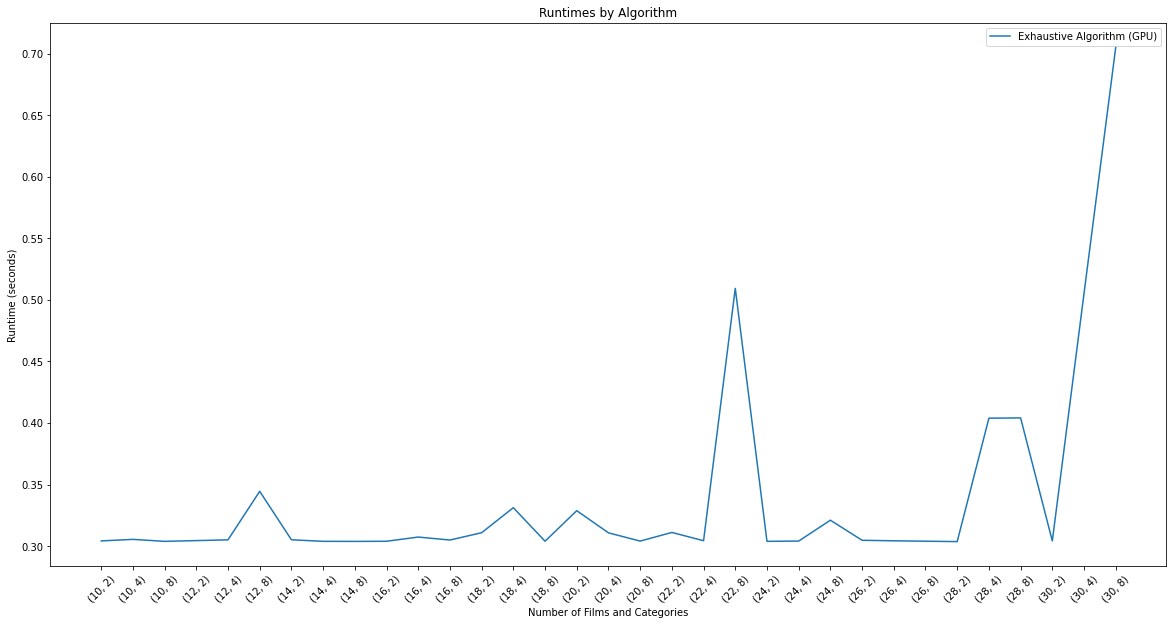

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
df_runtime['runtime_gpu'].plot(ax=ax, label='Exhaustive Algorithm (GPU)')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
ax.set_xticks(range(len(df_runtime.index)))
ax.set_xticklabels(df_runtime.index, rotation=45)
plt.show()